#INTEGRADOR - ESPACIO DE COLOR / MUESTREO / SEGMENTACION

Autor: Serafini, Martin Nicolas

Abril 2025

##CARGA DE LIBRERIAS

In [83]:
!pip install scikit-image watermark -q

In [84]:
# Bibliotecas necesarias
import numpy as np
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox, Dropdown, IntSlider
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image
from skimage import data
from ipywidgets import interact, Checkbox, Dropdown, IntSlider

In [85]:
# Informacion del entorno
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-04-23T17:21:30.180738+00:00

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.123+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

google    : 2.0.3
ipywidgets: 7.7.1
PIL       : 11.1.0
numpy     : 2.0.2
matplotlib: 3.10.0
skimage   : 0.25.2
cv2       : 4.11.0



##CARGA DE LA IMAGEN

In [86]:
!wget 'https://asociacionnovaforma.wordpress.com/wp-content/uploads/2020/03/joanmirc3b3.jpg'

--2025-04-23 17:21:30--  https://asociacionnovaforma.wordpress.com/wp-content/uploads/2020/03/joanmirc3b3.jpg
Resolving asociacionnovaforma.wordpress.com (asociacionnovaforma.wordpress.com)... 192.0.78.12, 192.0.78.13
Connecting to asociacionnovaforma.wordpress.com (asociacionnovaforma.wordpress.com)|192.0.78.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2363249 (2.3M) [image/jpeg]
Saving to: ‘joanmirc3b3.jpg.5’

joanmirc3b3.jpg.5   100%[===================>]   2.25M  11.7MB/s    in 0.2s    

2025-04-23 17:21:30 (11.7 MB/s) - ‘joanmirc3b3.jpg.5’ saved [2363249/2363249]



###USANDO PILLOW

In [87]:
# Cargo la imagen usando PIL
im = Image.open('joanmirc3b3.jpg')

###USANDO OPEN OPENCV

In [88]:
# Cargo la imagen usando OpenCV
im_cv=cv2.imread('joanmirc3b3.jpg')


Cuando se abre una imagen utilizando OpenCV esta se convierte a un array de Numpy que es ideal para hacer procesamiento de imagenes más pesado, como segmentación, bordes, detección, etc.

##INFORMACION DE LA IMAGEN

In [89]:
# Funcion para mostrar info de imagenes cargadas con Pillow
def mostrar_info_pil(imagen):
    ancho = imagen.width
    alto = imagen.height
    modo = imagen.mode
    formato = imagen.format
    tipo = type(imagen)
    columnas = ['Dato','Valor']
    print(f'{columnas[0]:<10}{columnas[1]:<40}')
    print(f'{"Ancho:":<10}{str(ancho):<40}')
    print(f'{"Alto:":<10}{str(alto):<40}')
    print(f'{"Modo:":<10}{str(modo):<40}')
    print(f'{"Formato:":<10}{str(formato):<40}')
    print(f'{"Tipo:":<10}{str(tipo):<40}')

Al utilizar PIL se puede acceder a cada dato de la informacion de la imagen de manera individual

In [90]:
mostrar_info_pil(im)

Dato      Valor                                   
Ancho:    6928                                    
Alto:     9899                                    
Modo:     CMYK                                    
Formato:  JPEG                                    
Tipo:     <class 'PIL.JpegImagePlugin.JpegImageFile'>


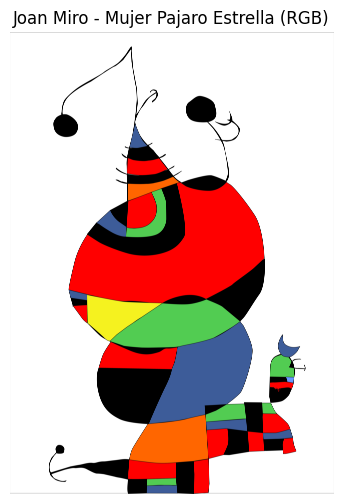

In [91]:
plt.figure(figsize=(8, 6))
plt.imshow(im)
plt.axis('off')
plt.title("Joan Miro - Mujer Pajaro Estrella (RGB)")
plt.show()

##MUESTREO

USANDO PILLOW

In [92]:
muestra = 8

In [93]:
im_muestra = im.resize((im.width // muestra, im.height // muestra))

In [94]:
mostrar_info_pil(im_muestra)

Dato      Valor                                   
Ancho:    866                                     
Alto:     1237                                    
Modo:     CMYK                                    
Formato:  None                                    
Tipo:     <class 'PIL.Image.Image'>               


###USANDO OPENCV

In [95]:
im_muestra_cv = im_cv[::muestra, ::muestra]

In [96]:
# Compruebo el tamaño para ver si coincide con el calculado con PIL
im_muestra_cv.shape

(1238, 866, 3)

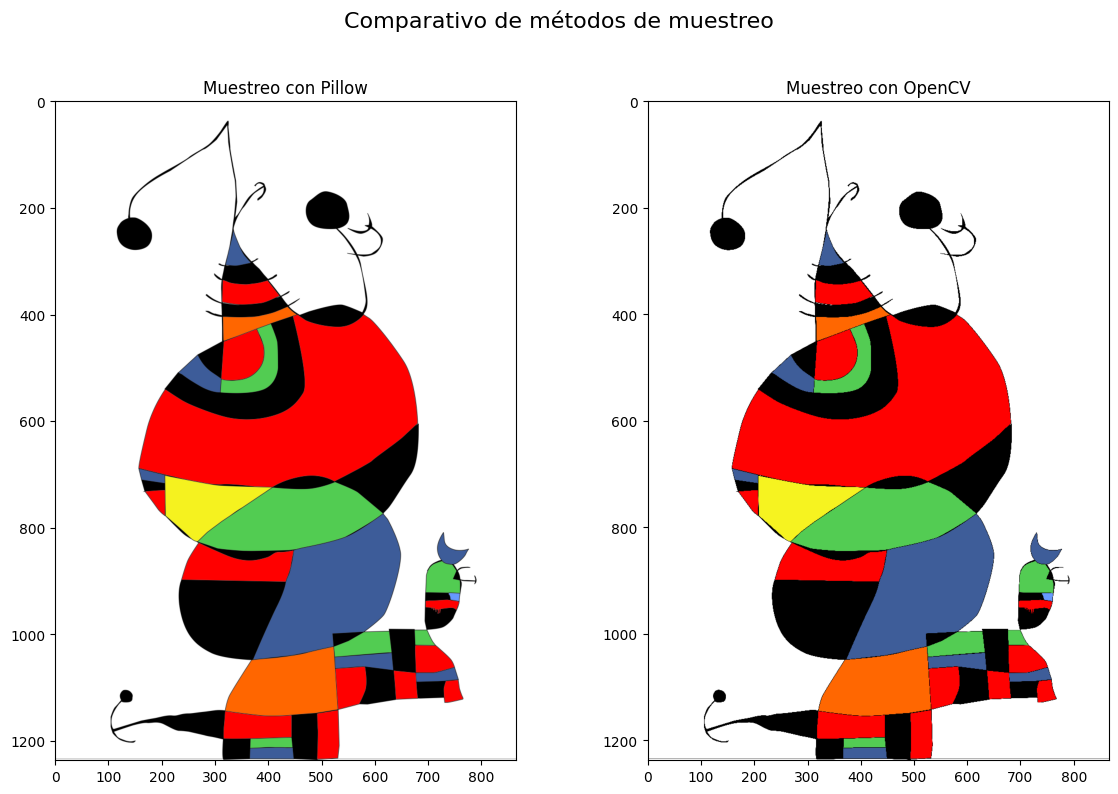

In [97]:
# Convertimos la imagen de OpenCV de BGR a RGB
im_muestra_cv_rgb = cv2.cvtColor(im_muestra_cv, cv2.COLOR_BGR2RGB)

# Crear figura
plt.figure(figsize=(12, 8))

# Título general
plt.suptitle("Comparativo de métodos de muestreo", fontsize=16)

# Imagen muestreada con PIL
plt.subplot(1, 2, 1)
plt.imshow(im_muestra)
plt.title('Muestreo con Pillow')

# Imagen muestreada con OpenCV (convertida a RGB)
plt.subplot(1, 2, 2)
plt.imshow(im_muestra_cv_rgb)
plt.title('Muestreo con OpenCV')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

###IMAGEN MUESTREADA (COMPARATIVA PILLOW / OPENCV)

In [98]:
rojo = im_muestra_cv[:,:,0]
verde = im_muestra_cv[:,:,1]
azul = im_muestra_cv[:,:,2]

In [99]:
# Como quiero exponer junto a la imagen en escala de gris, la imagen con los pesos calculado, la genero en esta instancia previa
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
gris_f = 1/3*rojo_f + 1/3*verde_f + 1/3*azul_f
muestra_cv_pesos = gris_f.astype(int)

In [100]:
# Convierto la imagen en CV a Gris
im_muestra_gris = cv2.cvtColor(im_muestra_cv, cv2.COLOR_BGR2GRAY)
# Convierto la imagen en Pillow a gris
im_gris_pil_muestra = im_muestra.convert('L')

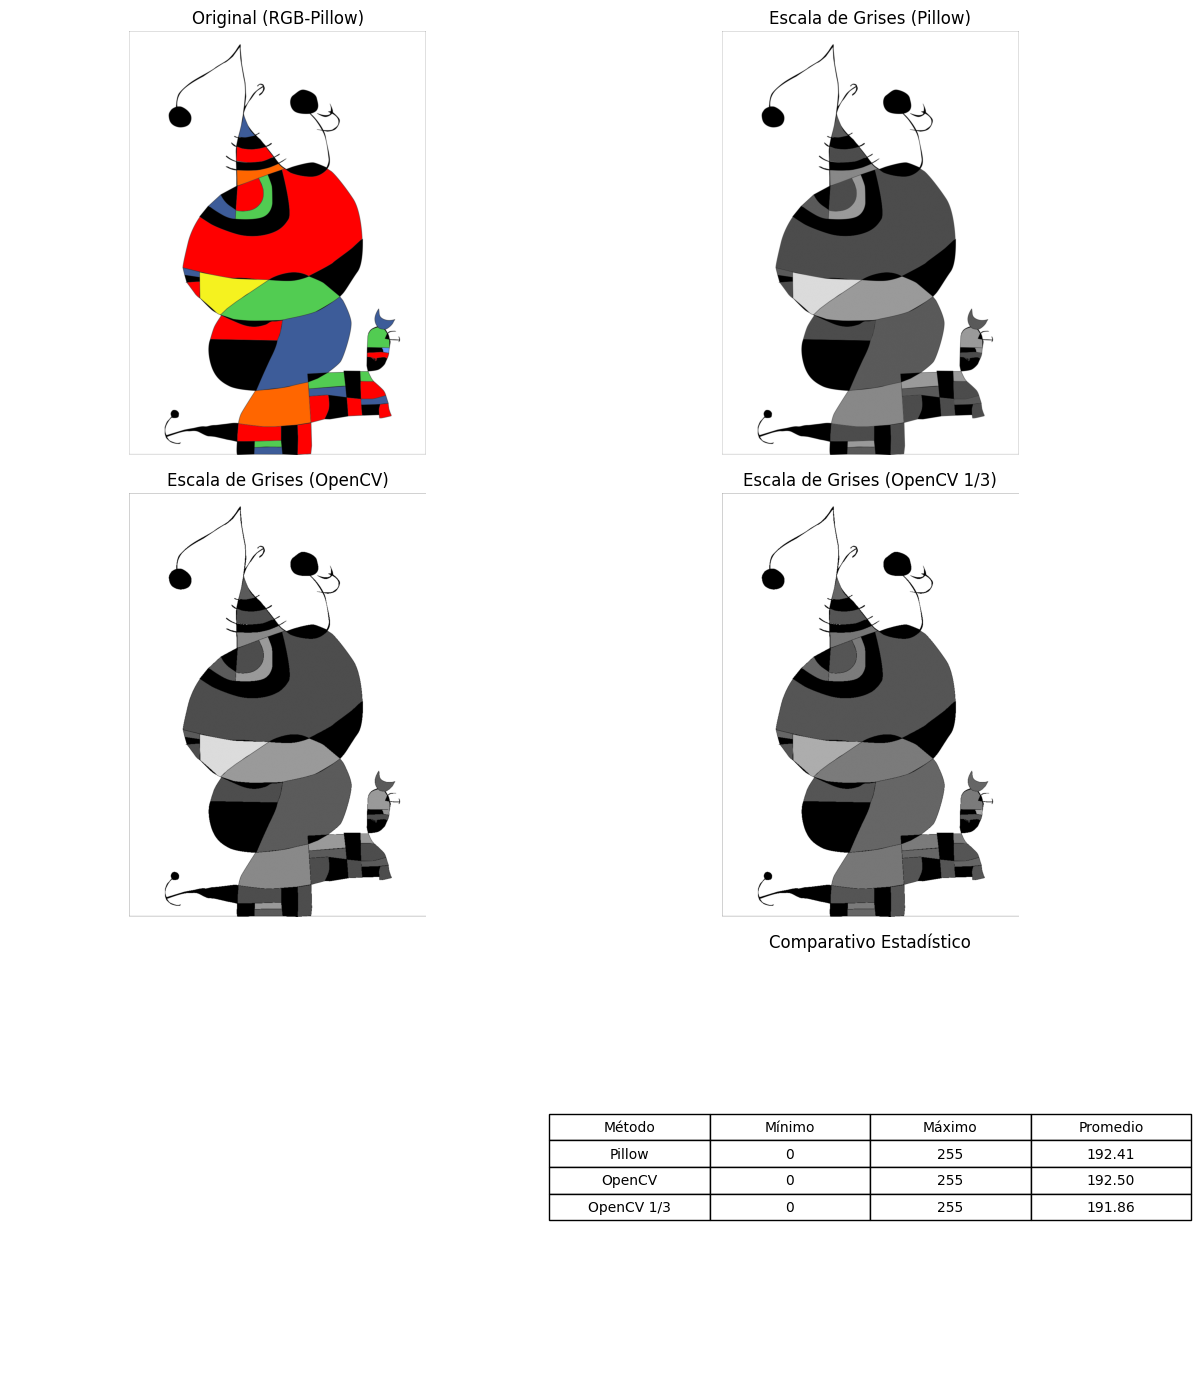

In [101]:
# Cálculo de estadísticas
datos = [
    ['Pillow',
     np.min(im_gris_pil_muestra),
     np.max(im_gris_pil_muestra),
     np.mean(im_gris_pil_muestra)],

    ['OpenCV',
     np.min(im_muestra_gris),
     np.max(im_muestra_gris),
     np.mean(im_muestra_gris)],

    ['OpenCV 1/3',
     np.min(muestra_cv_pesos),
     np.max(muestra_cv_pesos),
     np.mean(muestra_cv_pesos)]
]

columnas = ['Método', 'Mínimo', 'Máximo', 'Promedio']

# Creo figura con espacio extra para la tabla
fig, axes = plt.subplots(3, 2, figsize=(12, 14))

# Imagenes
axes[0,0].imshow(im_muestra);
axes[0,0].set_title("Original (RGB-Pillow)");
axes[0,0].axis('off')

axes[0,1].imshow(im_gris_pil_muestra, cmap='gray');
axes[0,1].set_title("Escala de Grises (Pillow)");
axes[0,1].axis('off')

axes[1,0].imshow(im_muestra_gris, cmap='gray');
axes[1,0].set_title("Escala de Grises (OpenCV)");
axes[1,0].axis('off')

axes[1,1].imshow(muestra_cv_pesos, cmap='gray');
axes[1,1].set_title("Escala de Grises (OpenCV 1/3)");
axes[1,1].axis('off')

axes[2, 0].axis('off')
axes[2, 1].axis('off')

# Muestro la tabla en uno de los ejes ocultos
tabla = axes[2, 1].table(
    cellText=[[f"{x:.2f}" if isinstance(x, float) else x for x in fila] for fila in datos],
    colLabels=columnas,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

# Ajustes de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)
axes[2, 1].set_title("Comparativo Estadístico")

plt.tight_layout()
plt.show()

Los promedios muestran una diferencia entre la conversion realizada por Pillow y OpenCV la cual se debe a que ambos utilizan fórmulas distintas para calcular la intensidad en escala de grises a partir de una imagen RGB.

OpenCV es más estricto y consistente con estándares de procesamiento digital.

##PALETA DE COLORES

In [102]:
# Cargo la imagen desde im_muestra (que ya viene de PIL)
im_paleta = im_muestra.copy()

# Me aseguro que este en modo RGB antes de convertir a paleta
im_paleta = im_paleta.convert("RGB")

# Convierto a modo paleta (la indexacion es en 256 colores)
im_paleta = im_paleta.convert("P", palette=Image.ADAPTIVE, colors=256)

# Obtengo la paleta
paleta = im_paleta.getpalette()

* Se Convierte la imagen al modo "P" (paleta), donde cada píxel ya no almacena un color completo (RGB), sino un índice a una tabla de colores.
* getpalette() devuelve una lista plana de valores RGB, donde cada grupo de 3 números es un color (R, G, B)

In [103]:
# Funcion para mostrar la paleta junto al histograma
def mostrar_paleta_e_histograma(imagen, paleta, titulo="Análisis de imagen"):
    # Convierto la paleta a arreglo de colores RGB a un arreglo de Numpy y lo redimensiono en formato de una matriz de 3 columnas (uno para cada color)
    colores = np.array(paleta).reshape(-1, 3) / 255
    # Calculo las dimensiones de la cuadricula de la paleta de colores
    n = len(colores)
    cols = int(np.ceil(n ** 0.5)) # Calcula tomando la raiz cuadrada de la cantidad de colores. Ceil es por ceiling, redondea el numero para arriba
    rows = int(np.ceil(n / cols))

    # Convierto la imagen a escala de grises si es necesario
    imagen_gris = imagen.convert("L") # L es por Luminosidad (modo escala de grises)
    # Convierto la imagen convertida a una matriz de numpy
    imagen_array = np.array(imagen_gris)

    # Calculo el brillo y contraste
    brillo = np.mean(imagen_array) # Representa la luminosidad de la imagen
    contraste = np.std(imagen_array) # Representa la variacion de las intensidades de la imagen
    print(f"Brillo: {brillo:.2f}, Contraste: {contraste:.2f}")

    # Creo las 2 figuras
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(titulo, fontsize=14)

    # Genero de la paleta de colores
    ax0 = axes[0]
    for idx, color in enumerate(colores): # Itero sobre cada color en la paleta.
        y, x = divmod(idx, cols) # Toma dos números y te devuelve una tupla con 2 valores cociente entero y resto
        ax0.add_patch(plt.Rectangle((x, y), 1, 1, color=color)) # Dibuja un rectangulo de 1x1 y le asigna el color iterado
    ax0.set_xlim(0, cols) # Define los limites de columnas de la paleta
    ax0.set_ylim(0, rows) # Define los limites de filas de la paleta
    ax0.axis('off')
    ax0.invert_yaxis()
    ax0.set_title("Paleta de colores")

    # Genero el Histograma
    axes[1].hist(imagen_array.ravel(), bins=256, range=(0, 256), color='gray')
    axes[1].set_title("Histograma de intensidades")
    axes[1].set_xlabel("Nivel de gris")
    axes[1].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

Brillo: 192.41, Contraste: 91.50


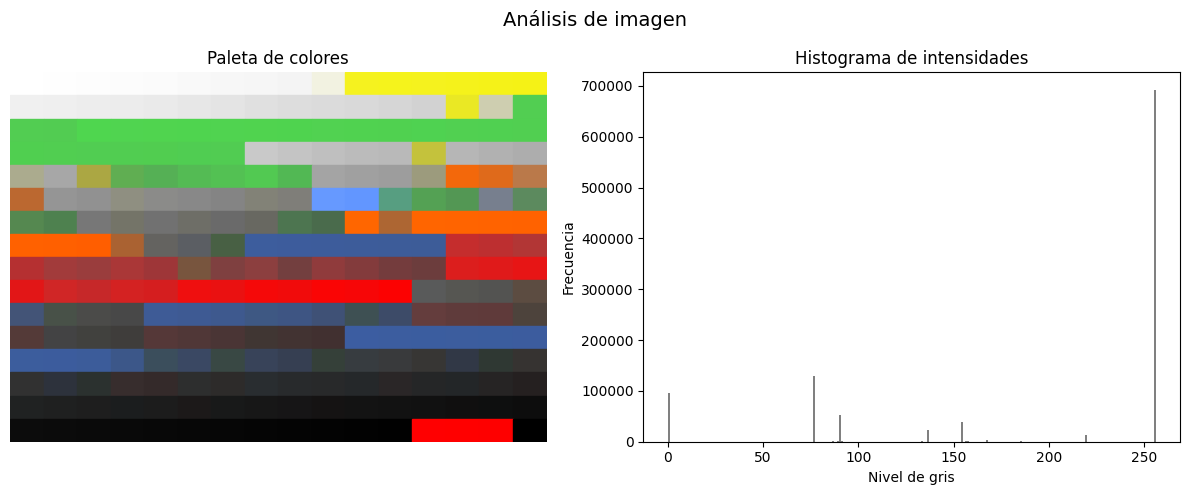

In [104]:
mostrar_paleta_e_histograma(im_muestra,paleta)

La imagen presenta un **brillo** alto (192.41/255) lo que indica que es mayormente clara.

El **contraste** es es 91.5, lo que se considera que es moderadamente alto (la escala también oscila entre 0-255, valores por encima de 70–80 ya muestran una variación visible). Esto implica que la imagen tiene buena diferenciación entre las zonas claras y oscuras, lo cual suele ser bueno para ver detalles.

La combinacion de ambos indicadores permite inferir que la imagen es apropiada para detectar formas o bordes con claridad.

##ANALISIS DE LOS CANALES DE COLOR

###IMAGEN POR CANAL DE COLOR

In [105]:
# Separo la imagen en los distintos canales
canal_rojo = im_muestra_cv[:,:,2]
canal_verde = im_muestra_cv[:,:,1]
canal_azul = im_muestra_cv[:,:,0]
canales = np.concatenate((canal_rojo,canal_verde,canal_azul),axis=1)

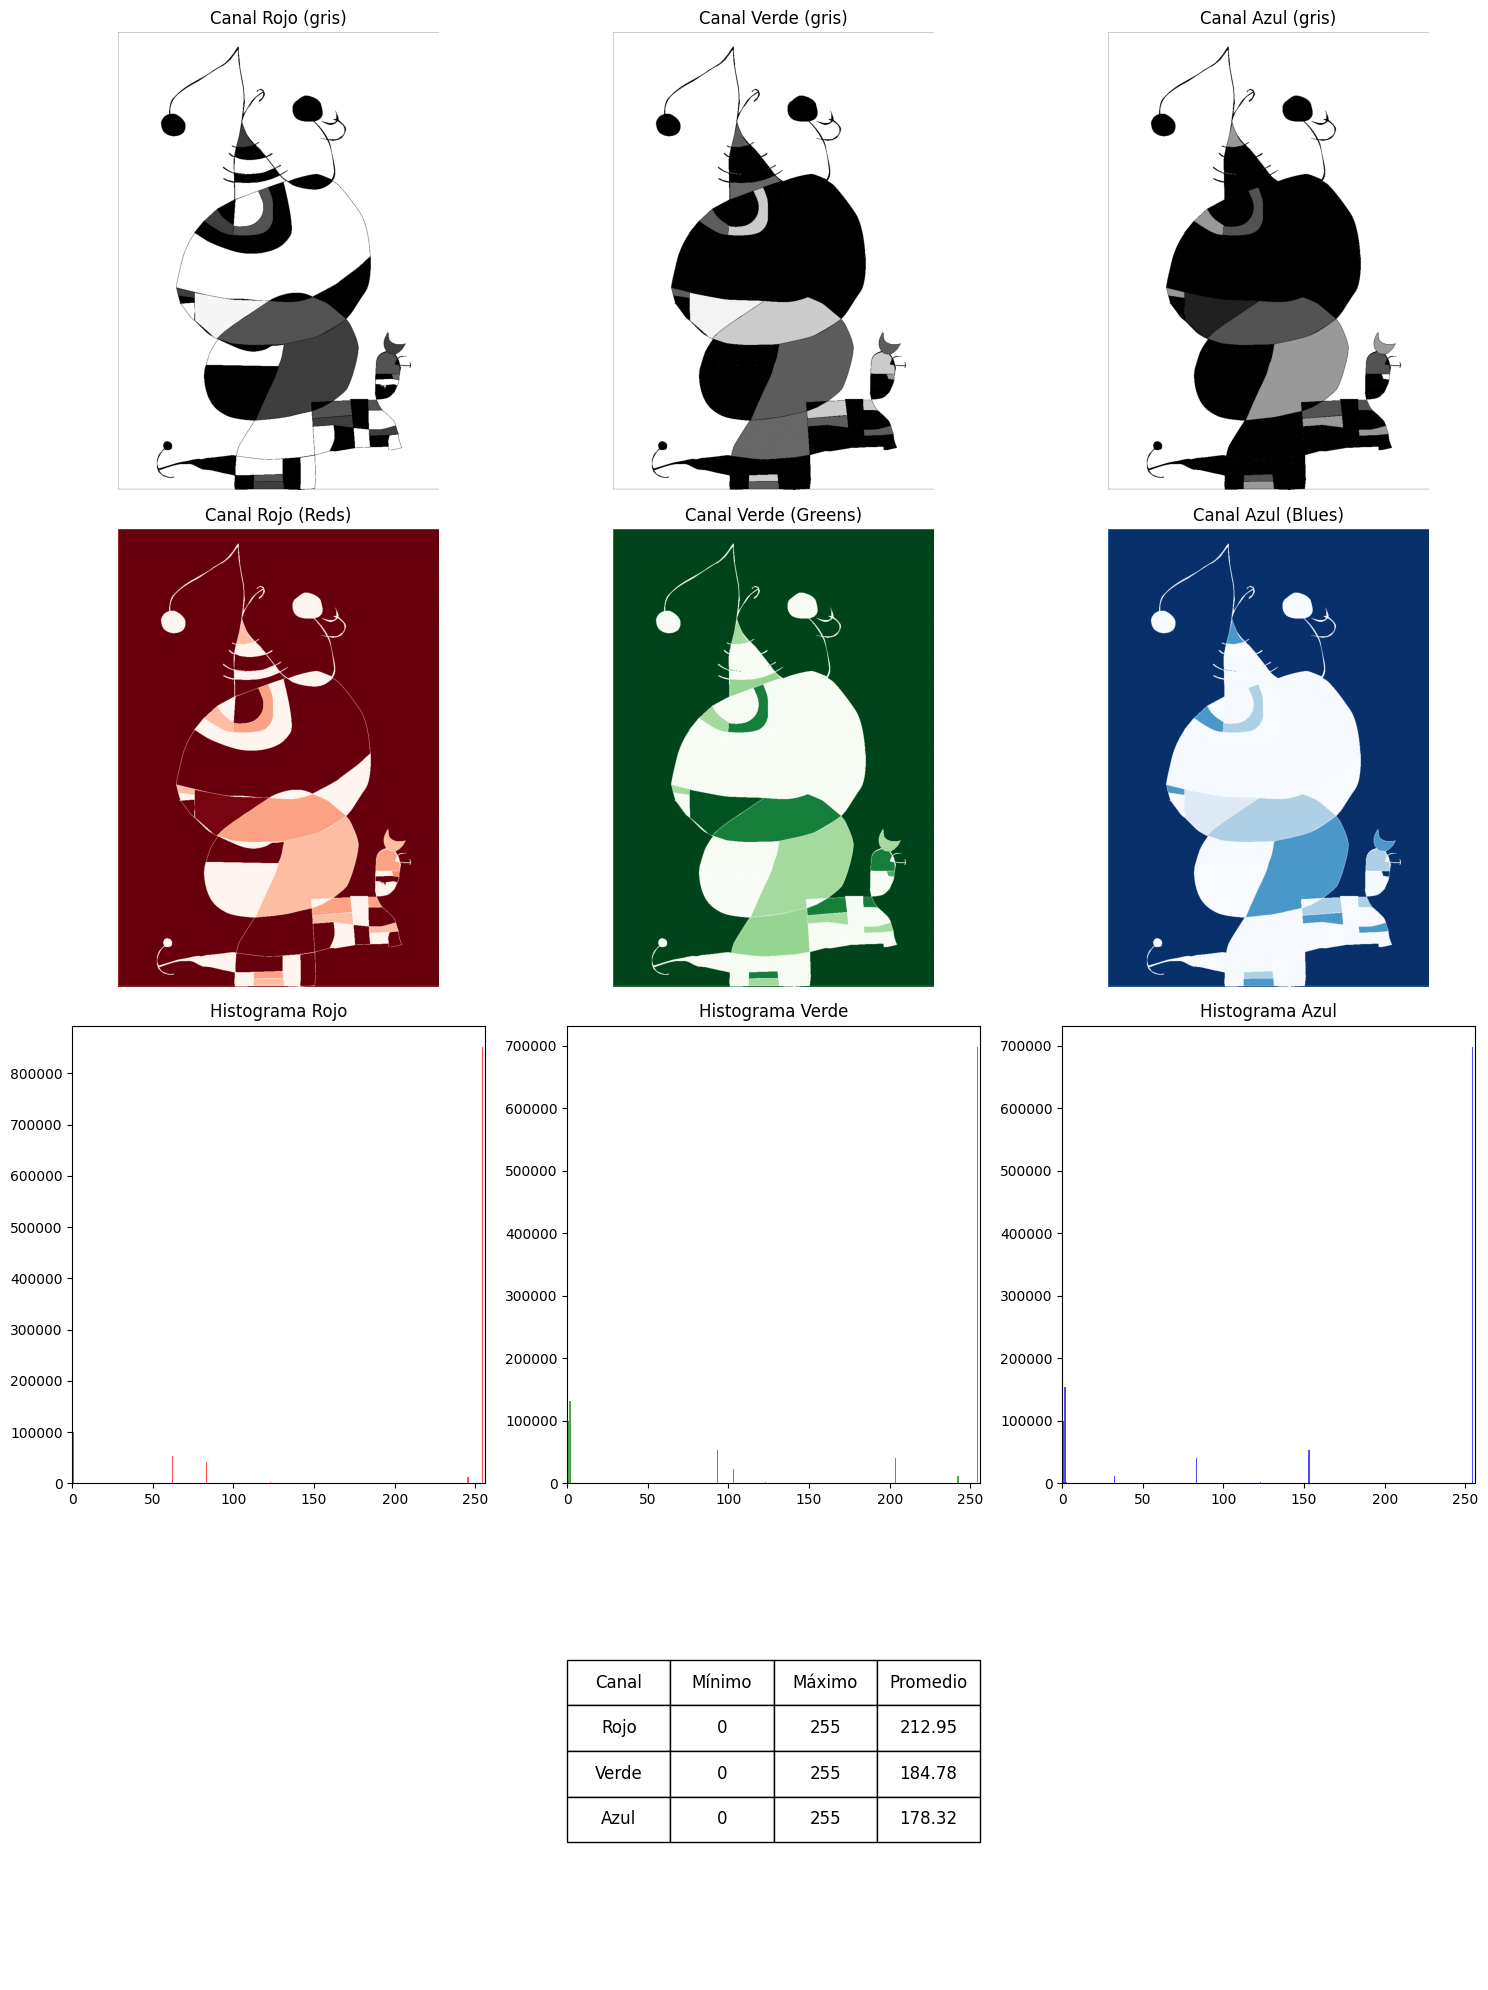

In [106]:
# Crear figura con 4 filas (3 de imágenes/histogramas + 1 de tabla)
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# === Fila 1: Escala de grises ===
axes[0, 0].imshow(canal_rojo, cmap='gray')
axes[0, 0].set_title("Canal Rojo (gris)")
axes[0, 0].axis('off')

axes[0, 1].imshow(canal_verde, cmap='gray')
axes[0, 1].set_title("Canal Verde (gris)")
axes[0, 1].axis('off')

axes[0, 2].imshow(canal_azul, cmap='gray')
axes[0, 2].set_title("Canal Azul (gris)")
axes[0, 2].axis('off')

# === Fila 2: Colormaps ===
axes[1, 0].imshow(canal_rojo, cmap='Reds')
axes[1, 0].set_title("Canal Rojo (Reds)")
axes[1, 0].axis('off')

axes[1, 1].imshow(canal_verde, cmap='Greens')
axes[1, 1].set_title("Canal Verde (Greens)")
axes[1, 1].axis('off')

axes[1, 2].imshow(canal_azul, cmap='Blues')
axes[1, 2].set_title("Canal Azul (Blues)")
axes[1, 2].axis('off')

# === Fila 3: Histogramas ===
axes[2, 0].hist(canal_rojo.ravel(), bins=256, color='red', alpha=0.7)
axes[2, 0].set_title("Histograma Rojo")
axes[2, 0].set_xlim(0, 256)

axes[2, 1].hist(canal_verde.ravel(), bins=256, color='green', alpha=0.7)
axes[2, 1].set_title("Histograma Verde")
axes[2, 1].set_xlim(0, 256)

axes[2, 2].hist(canal_azul.ravel(), bins=256, color='blue', alpha=0.7)
axes[2, 2].set_title("Histograma Azul")
axes[2, 2].set_xlim(0, 256)

# === Fila 4: Tabla de estadísticas ===
# Datos de estadística
datos = [
    ["Rojo", np.min(canal_rojo), np.max(canal_rojo), np.mean(canal_rojo)],
    ["Verde", np.min(canal_verde), np.max(canal_verde), np.mean(canal_verde)],
    ["Azul", np.min(canal_azul), np.max(canal_azul), np.mean(canal_azul)],
]

columnas = ["Canal", "Mínimo", "Máximo", "Promedio"]

# Crear tabla en el subplot del centro (usar el eje central)
axes[3, 1].axis('off')  # Ocultamos el eje
tabla = axes[3, 1].table(cellText=[[f"{x:.2f}" if isinstance(x, float) else x for x in fila] for fila in datos],
                         colLabels=columnas,
                         loc='center',
                         cellLoc='center',
                         colLoc='center')
tabla.scale(1, 2)  # Ajustar tamaño vertical
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

# Ocultar los otros dos subplots de la fila de tabla
axes[3, 0].axis('off')
axes[3, 2].axis('off')

# Mostrar todo
plt.tight_layout()
plt.show()

##SEGMENTACION POR COLOR


###IMAGEN CON PESOS AJUSTADOS

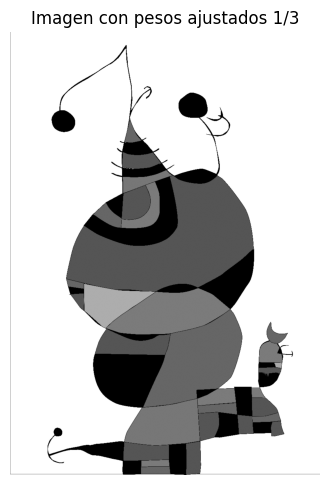

In [107]:
# Traigo la imagen ya procesada de antes con los pesos 1/3
plt.figure(figsize=(4, 6))
plt.imshow(muestra_cv_pesos, cmap='gray')
plt.axis('off')
plt.title("Imagen con pesos ajustados 1/3")
plt.show()

In [108]:
def histograma(X):
    X = np.clip(X, 0, 255).astype(int)
    (N, M) = X.shape
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i, j]
            h[x] += 1
    plt.plot(range(256), h)
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

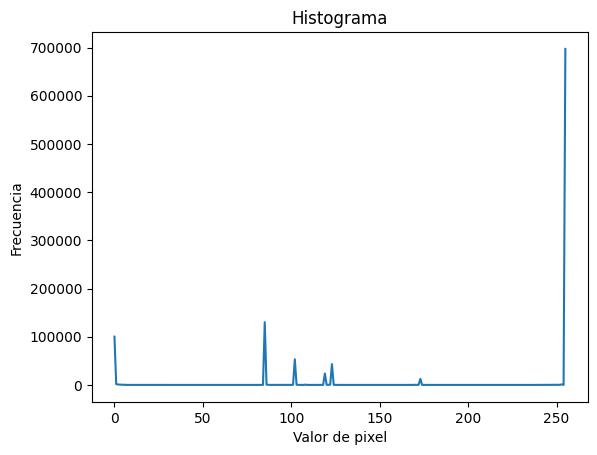

In [109]:
histograma(muestra_cv_pesos)

###SEGMENTACION



Se elige el segmentar por el color verde. Por default estan los valores que encontre mas optimos.

In [110]:
segmentacion_datos = []

def segmentar(valor_azul=207, operacion_azul="menor",
              valor_verde=178, operacion_verde="mayor",
              valor_rojo=193, operacion_rojo="menor"):

    # Segmentacion por canal
    seg_r = canal_rojo > valor_rojo if operacion_rojo == "mayor" else canal_rojo < valor_rojo
    seg_v = canal_verde > valor_verde if operacion_verde == "mayor" else canal_verde < valor_verde
    seg_a = canal_azul > valor_azul if operacion_azul == "mayor" else canal_azul < valor_azul

    # Concatenacion visual horizontal de los tres canales
    seg_rgb = np.concatenate((seg_r, seg_v, seg_a), axis=1)

    # Máscara combinada final
    seg_rv = np.logical_and(seg_r, seg_v)
    seg = np.logical_and(seg_rv, seg_a)

    # Creo figura con tamaños personalizados
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(1, 3, width_ratios=[2, 1, 0.1])  # El primer gráfico ocupa más espacio

    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(seg_rgb * 255, cmap='gray')
    ax1.set_title("Segmentación por canal (RGB)")
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[1])
    ax2.imshow(seg * 255, cmap='gray')
    ax2.set_title("Máscara final combinada")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Guardo datos de segmentacion
    segmentacion_datos.clear()
    segmentacion_datos.append((valor_rojo, operacion_rojo))
    segmentacion_datos.append((valor_verde, operacion_verde))
    segmentacion_datos.append((valor_azul, operacion_azul))

    return segmentacion_datos

# Widget interactivo
widget2 = interact(
    segmentar,
    valor_azul=(0, 255, 1), operacion_rojo=["mayor", "menor"],
    valor_verde=(0, 255, 1), operacion_verde=["mayor", "menor"],
    valor_rojo=(0, 255, 1), operacion_azul=["mayor", "menor"]
)

interactive(children=(IntSlider(value=207, description='valor_azul', max=255), Dropdown(description='operacion…

Datos segmentacion: [(193, 'menor'), (178, 'mayor'), (207, 'menor')]


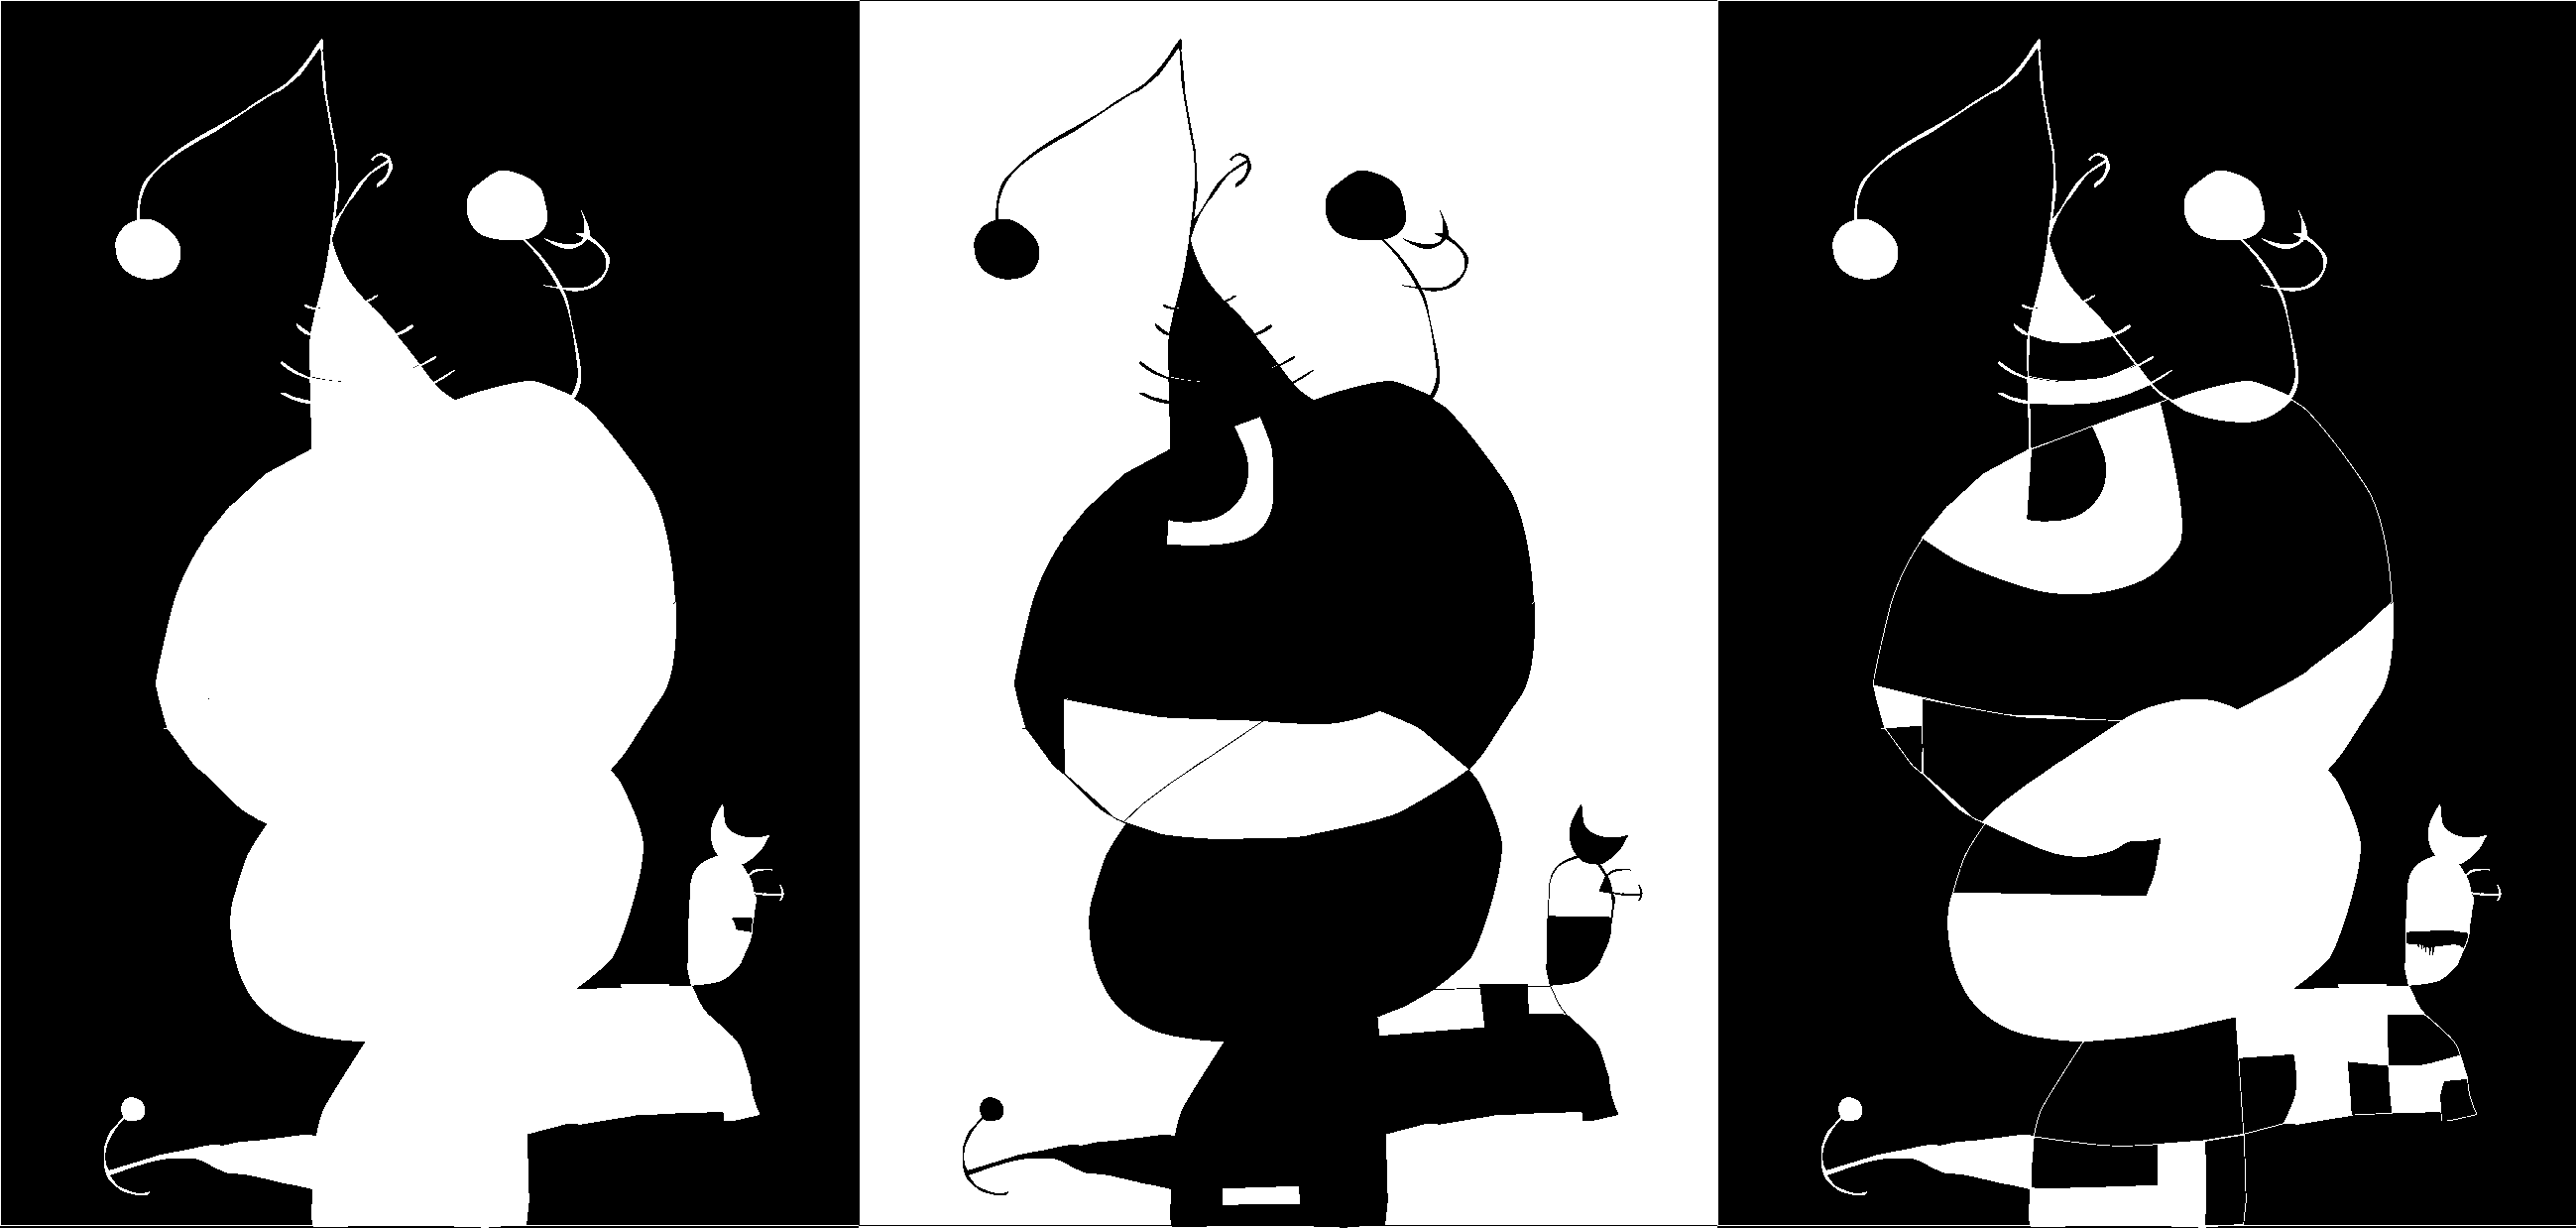

In [111]:
# La lista esta compuestas por sublistas por cada canal que incluye el umbral y la operacion
print(f'Datos segmentacion: {segmentacion_datos}')

# Segmentación por canal basada en datos_segmentacion
seg_r = rojo < segmentacion_datos[0][0] if segmentacion_datos[0][1] == "menor" else rojo > segmentacion_datos[0][0]
seg_v = verde < segmentacion_datos[1][0] if segmentacion_datos[1][1] == "menor" else verde > segmentacion_datos[1][0]
seg_a = azul < segmentacion_datos[2][0] if segmentacion_datos[2][1] == "menor" else azul > segmentacion_datos[2][0]

# Concatena las segmentaciones y mostrar la imagen
seg_rgb = np.concatenate((seg_r, seg_v, seg_a), axis=1)
cv2_imshow(seg_rgb * 255)

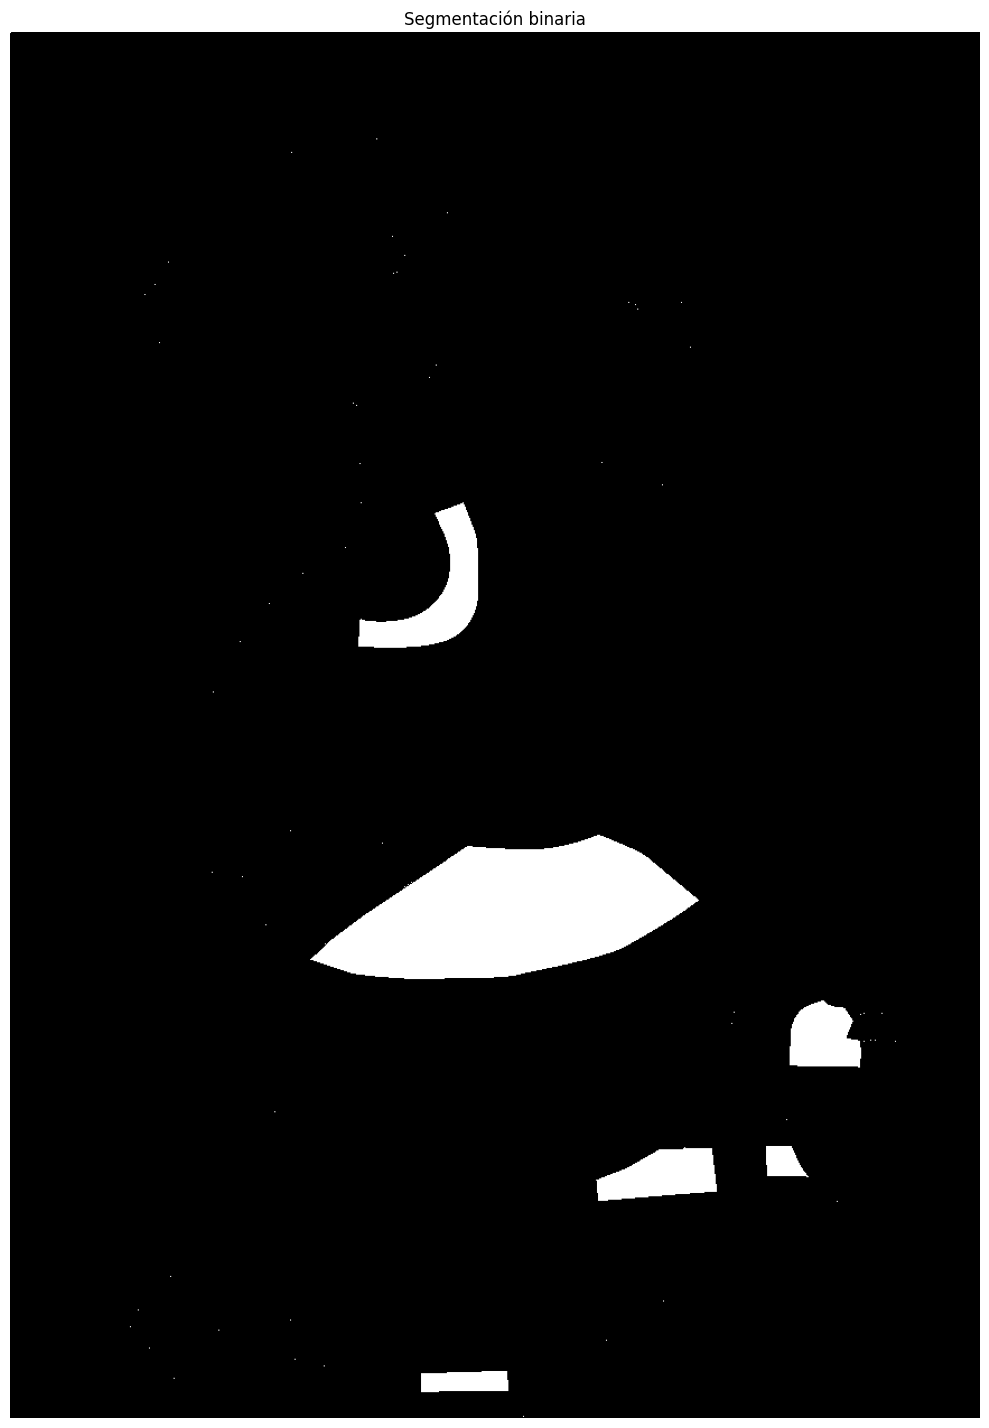

In [112]:
seg_rv = np.logical_and(seg_r,seg_v)
seg = np.logical_and(seg_rv,seg_a)
plt.figure(figsize=(14, 18))
plt.imshow(seg * 255, cmap='gray')
plt.title("Segmentación binaria")
plt.axis('off')
plt.show()


La segmentacion presenta pixeles aislados.

###FILTRO DE PIXELES AISLADOS

Se realiza un filtro con slider tanto en filas como en columnas.

In [113]:
datos_umbrales = []

def eliminar_pixeles(umbral_fila=6, umbral_col=8):
    # Obtiene dimensiones
    (N, M) = seg.shape

    # Copia para no modificar el original
    limpia = seg.copy()

    # Elimina filas con poca activación
    for i in range(N):
        if np.sum(seg[i, :]) < umbral_fila:
            limpia[i, :] = 0

    # Elimina columnas con poca activación
    for j in range(M):
        if np.sum(seg[:, j]) < umbral_col:
            limpia[:, j] = 0

    # Muestra los graficos
    plt.figure(figsize=(14, 18))
    plt.imshow(limpia * 255, cmap='gray')
    plt.title("Imagen Segmentada con Filtro de Umbrales", fontsize=16)
    plt.axis('off')
    plt.show()

    # Guardar los umbrales usados
    datos_umbrales.clear()
    datos_umbrales.append(umbral_fila)
    datos_umbrales.append(umbral_col)

    return datos_umbrales

# Interfaz interactiva
interact(eliminar_pixeles, umbral_fila=(0, 300, 1), umbral_col=(0, 300, 1))

interactive(children=(IntSlider(value=6, description='umbral_fila', max=300), IntSlider(value=8, description='…

<function __main__.eliminar_pixeles(umbral_fila=6, umbral_col=8)>

Con los valore optimos obtenidos y exportados a una lista se recrea la limpieza de pixeles para poder usarla en los pasos siguientes.

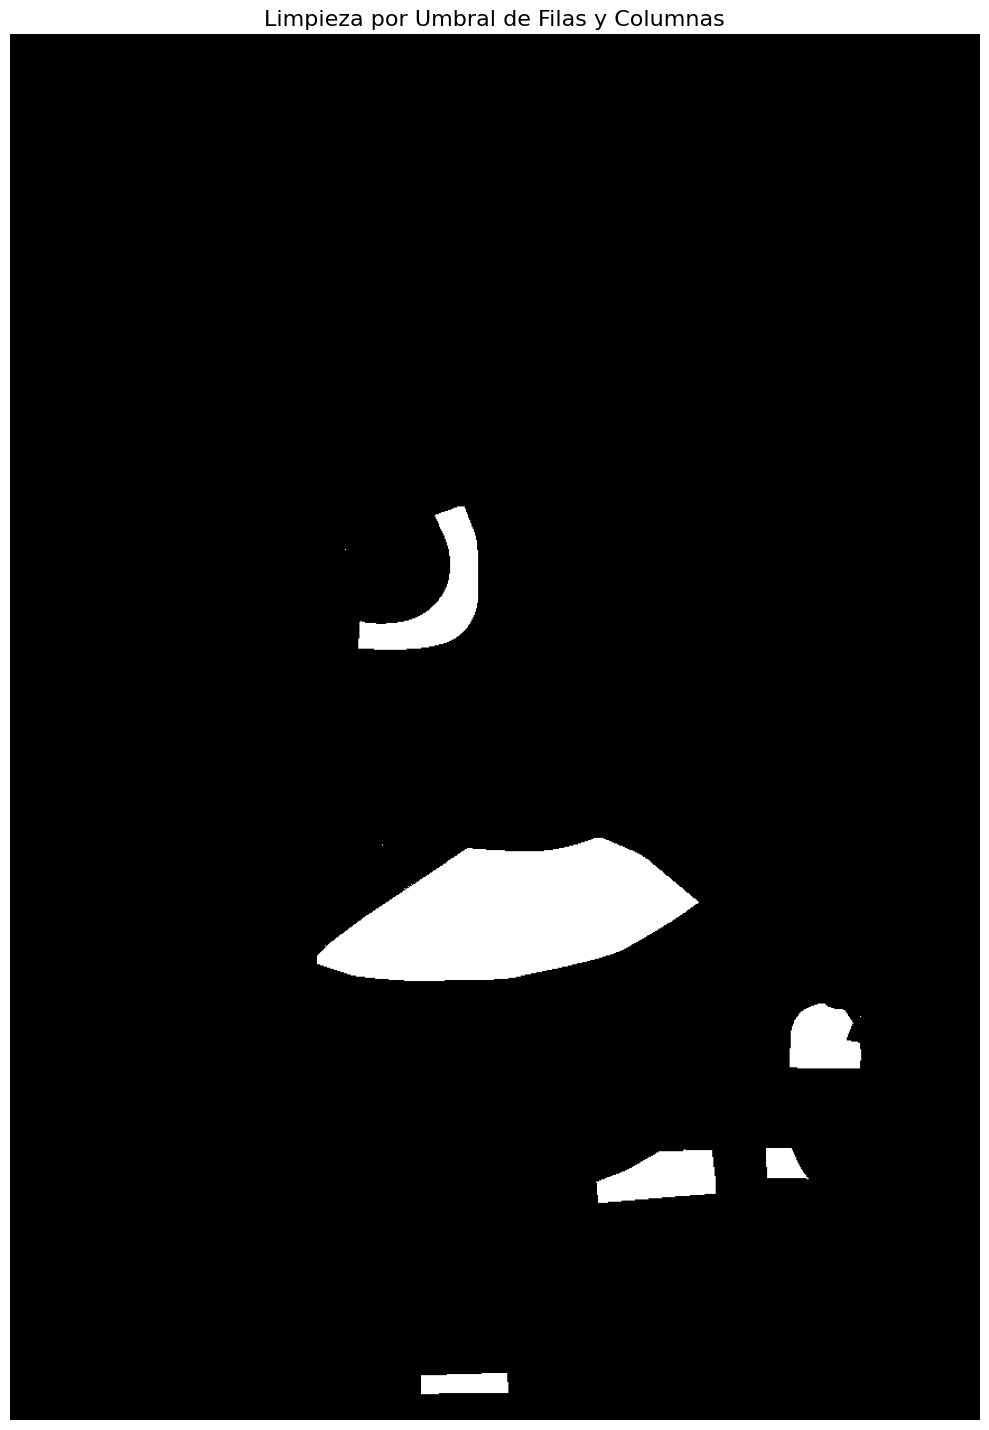

In [114]:
# Obtiene las dimensiones de la imagen segmentada
(N, M) = seg.shape

# Crea copia para no modificar el original
limpia_filcol = seg.copy()

# Elimina filas según umbral
for i in range(N):
    if np.sum(seg[i, :]) < datos_umbrales[0]:
        limpia_filcol[i, :] = 0

# Elimina columnas según umbral
for j in range(M):
    if np.sum(seg[:, j]) < datos_umbrales[1]:
        limpia_filcol[:, j] = 0

# Muestra la imagen con Matplotlib
plt.figure(figsize=(14, 18))
plt.imshow(limpia_filcol * 255, cmap='gray')
plt.title("Limpieza por Umbral de Filas y Columnas", fontsize=16)
plt.axis('off')
plt.show()

###DELIMITACION DE LA IMAGEN

El código tiene como objetivo determinar las coordenadas mínimas y máximas (en filas y columnas) de la zona segmentada dentro de una imagen binaria (limpia_filcol), con el fin de luego dibujar un rectángulo que la delimite.

Se inicializan los valores mínimos (i_min, j_min) con el valor del alto y ancho de la imagen para garantizar que cualquier valor de índice de la imagen sea más bajo y, por lo tanto, lo pueda reemplazar

Solo entra en el bloque if cuando el valor del píxel es mayor a 0 (es decir, forma parte de la zona segmentada) y luego busca los vertices del rectangulo.

In [115]:
# Calculo de las coordenadas del rectangulo
(N,M) = limpia_filcol.shape
i_min = N
i_max = 0
j_min = M
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia_filcol[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

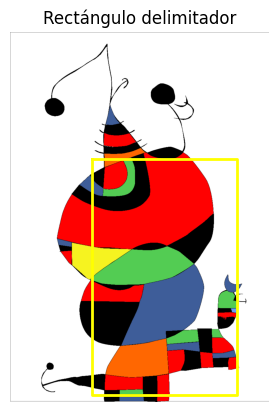

In [116]:
# La imagen original a trata esta abierta en OpenCV por lo que se Convierte a RGB
im_muestra_rgb = cv2.cvtColor(im_muestra_cv, cv2.COLOR_BGR2RGB)

# Coordenadas del rectángulo
# Se construyen dos listas (x e y) que representan los puntos que forman un rectángulo cerrado.
y = [i_min, i_min, i_max, i_max, i_min]
x = [j_min, j_max, j_max, j_min, j_min]

# Sobreimprime imagen con el rectángulo
plt.imshow(im_muestra_rgb)
plt.plot(x, y, color='yellow', linewidth=2)
plt.title('Rectángulo delimitador')
plt.axis('off')
plt.show()

###DETECCION DE BORDES

* Crea de la matriz
  * Se crea una matriz del mismo tamaño que la imagen segmentada (N filas y M columnas).
  * Esta matriz llamada borde se llena con ceros (0) y se usará para marcar los bordes detectados.
  * El tipo de dato np.uint8 permite que la imagen pueda representarse como imagen en escala de grises (valores de 0 a 255).
* Bordes
  * Recorre cada fila/columna, comparando un píxel con el de la fila/columna anterior.
  * Si hay diferencia de valor, se marca como borde.
* Visualizacion
  * Muestra la matriz borde como una imagen en blanco y negro:
  * Los ceros (0) se ven negros → zonas sin borde.
  * Los unos (1), al multiplicarse por 255, se ven blancos → zonas donde hay cambio y, por lo tanto, borde detectado.

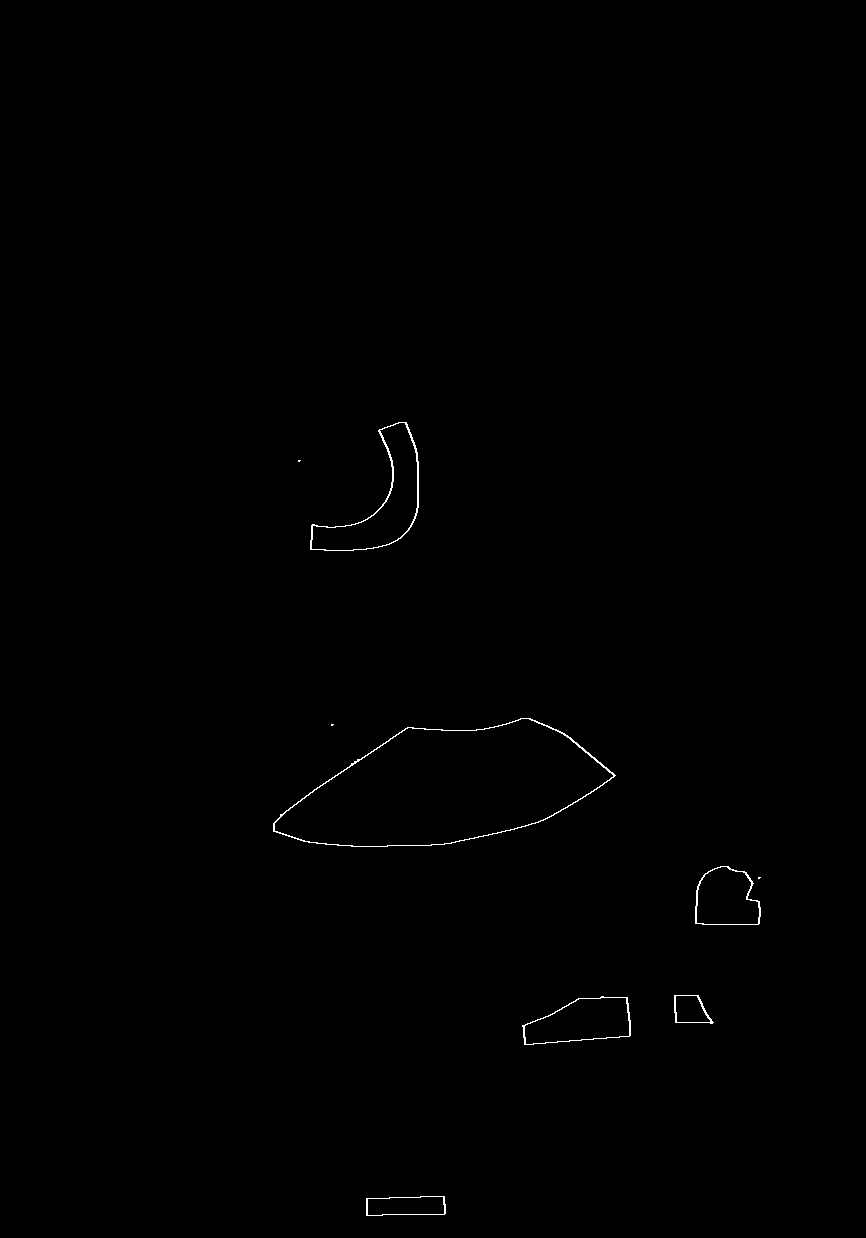

In [117]:
# Detección de bordes
borde = np.zeros((N,M),np.uint8)
# Bordes horizontales
for i in range(N):
    for j in range(1,M):
        if limpia_filcol[i,j]!=limpia_filcol[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1
# Bordes verticales
for i in range(1,N):
    for j in range(M):
        if limpia_filcol[i-1,j]!=limpia_filcol[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
cv2_imshow(borde*255)

###RESULTADO DE LA SEGMENTACION
* Se Realiza la visualización de la imagen con el borde segmentado (determinando la región delimitada), con la opción de cambiar el color y el grosor del borde.

* Se usa el operador de dilatación de OpenCV (cv2.dilate), que aumenta las áreas de interés (en este caso, los bordes segmentados).
  * kernel = Se usa np.ones((grosor, grosor), np.uint8) para crear una matriz de unos (un "kernel") de tamaño (grosor, grosor). Este kernel se usa para "expandir" las regiones de los bordes segmentados.
  * cv2.dilate(borde, kernel, iterations=1) realiza la dilatación, y esto expande los bordes donde los píxeles tienen valor 1. Cuanto mayor sea el valor de grosor, más grueso es el borde.

In [118]:
# Diccionario con los colores de la línea (BGR para OpenCV)
colores = {
    'Blanco': (255, 255, 255),
    'Negro': (0, 0, 0),
    'Rojo': (0, 0, 255),
    'Azul': (255, 0, 0),
    'Verde': (0, 255, 0),
    'Amarillo': (0, 255, 255)
}

# Función para sobreimprimir borde con grosor variable
def mostrar_con_borde(color_nombre, grosor):
    # Color del borde
    color = colores[color_nombre]
    img_final = im_muestra_cv.copy()

    # Se dilata el borde para aumentar su grosor
    kernel = np.ones((grosor, grosor), np.uint8)
    borde_grueso = cv2.dilate(borde, kernel, iterations=1)

    # Recorre toda la matriz de la imagen para aplicar el color deseado en las posiciones donde hay borde (valor = 1)
    for i in range(N):
        for j in range(M):
            if borde_grueso[i, j] == 1:
                img_final[i, j, :] = color

    # Convierto a RGB para visualizar matplotlib
    img_rgb = cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB)

    # Muestra la imagen
    plt.figure(figsize=(7, 10))
    plt.imshow(img_rgb)
    plt.title(f"Borde en color: {color_nombre} (Grosor: {grosor}px)")
    plt.axis('off')
    plt.show()

# Menú interactivo
interact(
    mostrar_con_borde,
    color_nombre=Dropdown(
        options=list(colores.keys()),
        value='Amarillo',
        description='Color del Borde:',
        style={'description_width': 'initial'}
    ),
    grosor=IntSlider(
        value=3,
        min=1,
        max=5,
        step=1,
        description='Grosor del Borde:',
        style={'description_width': 'initial'}
    )
)


interactive(children=(Dropdown(description='Color del Borde:', index=5, options=('Blanco', 'Negro', 'Rojo', 'A…

<function __main__.mostrar_con_borde(color_nombre, grosor)>

Para la creacion de sliders se puede utilizar tanto la forma abreviada valor(minimo,maximo,incremento) o IntSlider o FloatSlider que ofrece mayores posibilidades de personalizacion.